In [8]:
import cv2
import os
import matplotlib.pyplot as plt

DATASET_DIR = r"C:\UNI\Fall 2025 Senior\CV\Project\CV_Project_Group3\dataset2"
TARGET_WIDTH = 1280


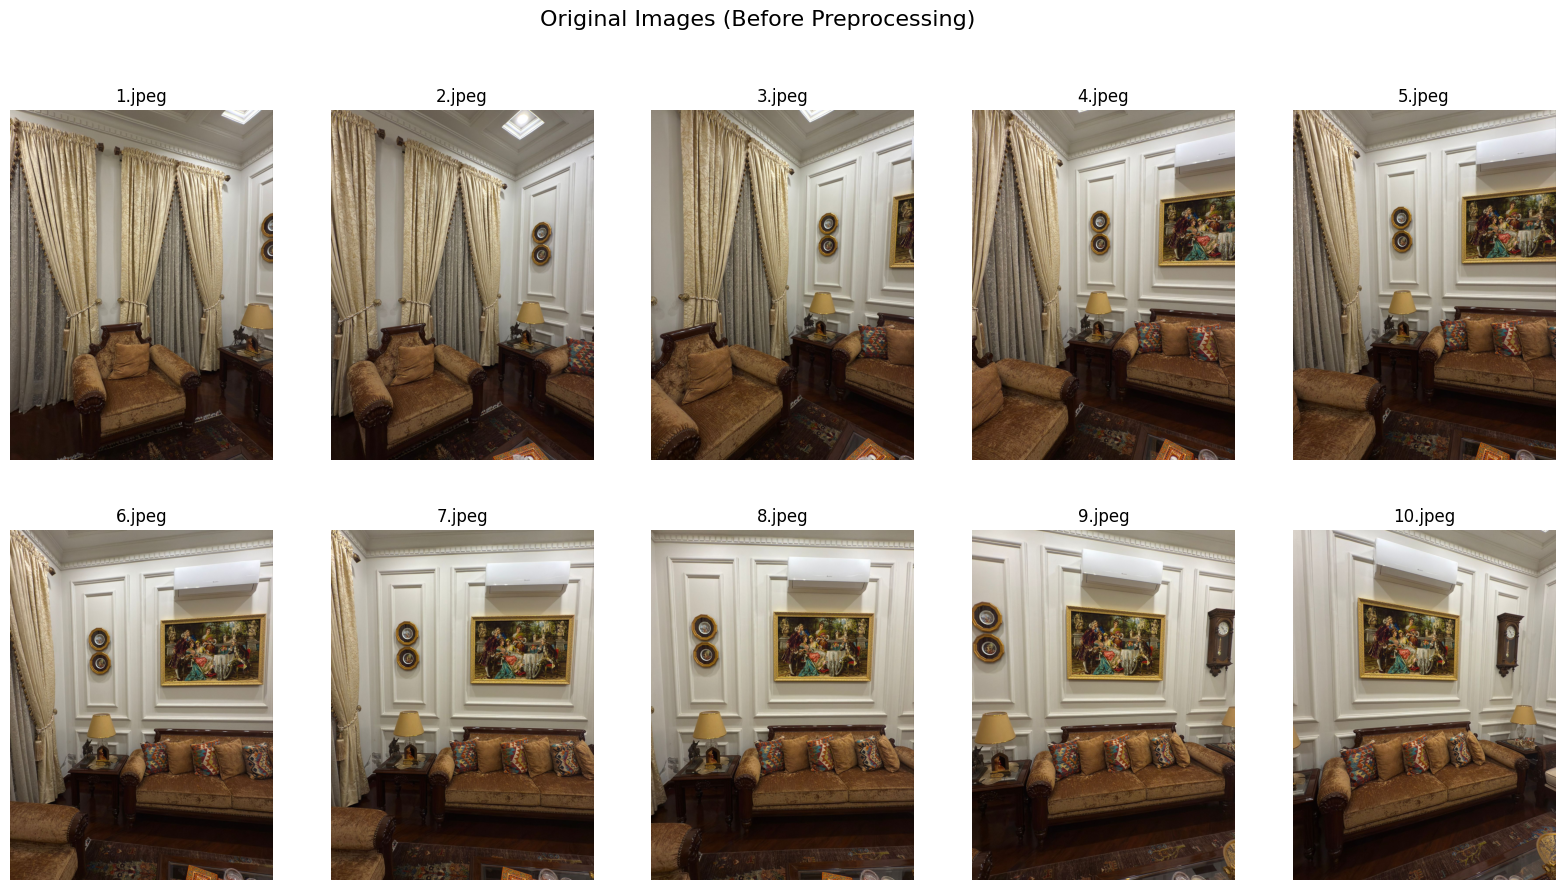

In [9]:
images = []
for i in range(1, 11):
    path = os.path.join(DATASET_DIR, f"{i}.jpeg")
    img = cv2.imread(path)
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

plt.figure(figsize=(20, 10))
for idx, img in enumerate(images):
    plt.subplot(2, 5, idx + 1)
    plt.imshow(img)
    plt.title(f"{idx + 1}.jpeg")
    plt.axis("off")
plt.suptitle("Original Images (Before Preprocessing)", fontsize=16)
plt.show()

In [10]:
preprocessed = []
for i in range(1, 11):
    path = os.path.join(DATASET_DIR, f"{i}.jpeg")
    img = cv2.imread(path)
    if img is None:
        continue

    h, w = img.shape[:2]
    if w > TARGET_WIDTH:
        scale = TARGET_WIDTH / w
        img = cv2.resize(img, (TARGET_WIDTH, int(h * scale)))

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    preprocessed.append(gray)



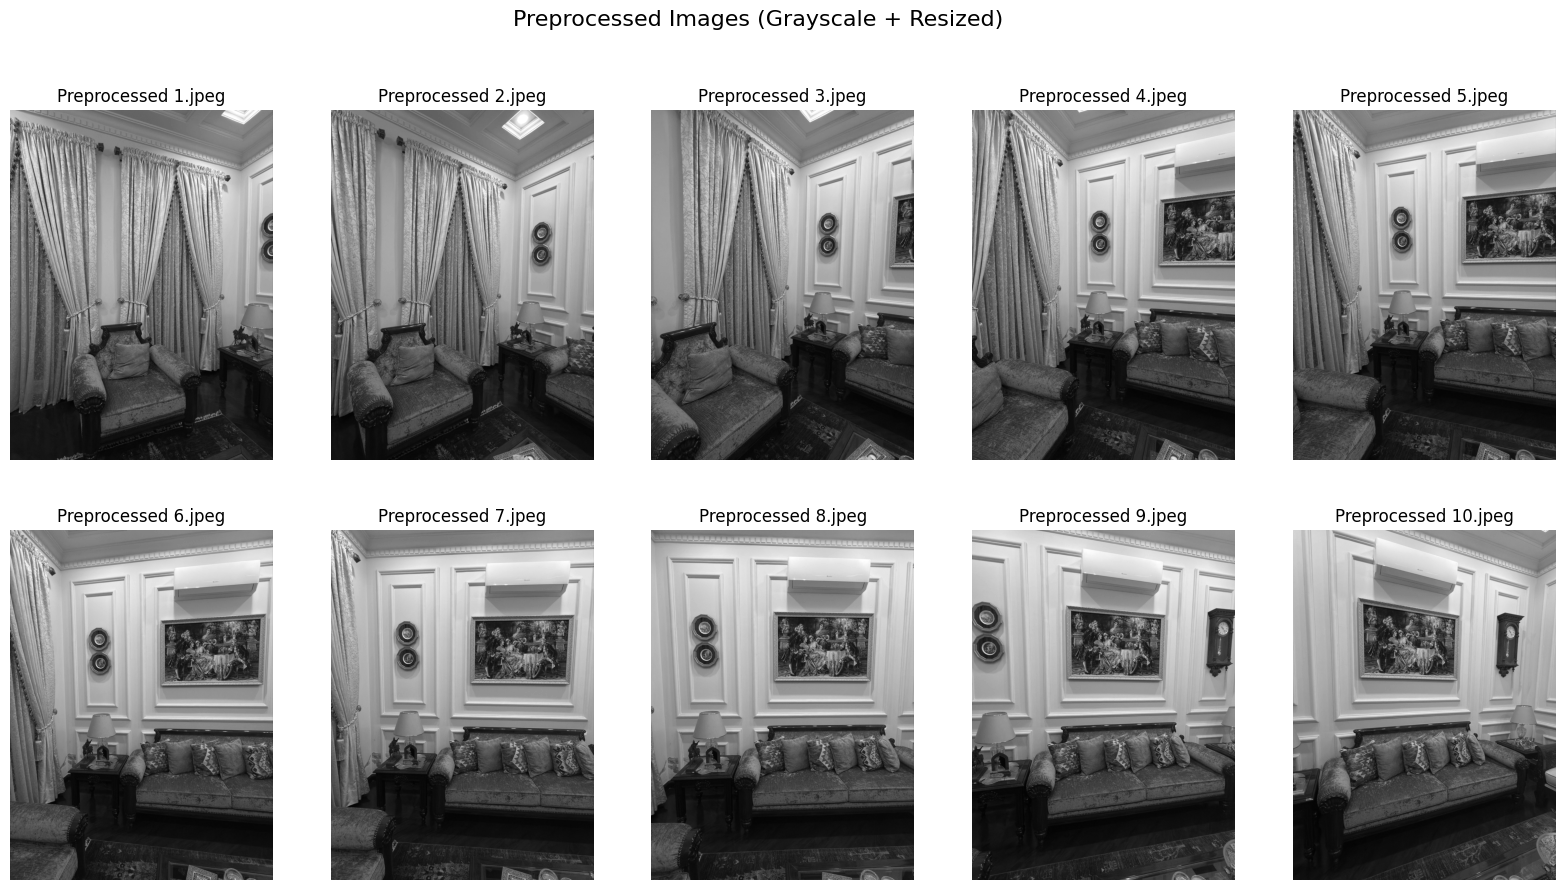

In [11]:
plt.figure(figsize=(20, 10))
for idx, img in enumerate(preprocessed):
    plt.subplot(2, 5, idx + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Preprocessed {idx + 1}.jpeg")
    plt.axis("off")
plt.suptitle("Preprocessed Images (Grayscale + Resized)", fontsize=16)
plt.show()

In [12]:

sift = cv2.SIFT_create()
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)


def load_gray(idx):
    path = os.path.join(DATASET_DIR, f"{idx}.jpeg")
    img = cv2.imread(path)
    if img is None:
        raise ValueError(f"Could not load {path}")
    h, w = img.shape[:2]
    if w > TARGET_WIDTH:
        scale = TARGET_WIDTH / w
        img = cv2.resize(img, (TARGET_WIDTH, int(h * scale)))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray


def match_and_draw(i, j, max_draw=500):
    img1 = load_gray(i)
    img2 = load_gray(j)

    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    print(f"Image {i}: {len(kp1)} keypoints, Image {j}: {len(kp2)} keypoints")

    knn_matches = bf.knnMatch(des1, des2, k=2)

    good = []
    ratio_thresh = 0.75
    for m, n in knn_matches:
        if m.distance < ratio_thresh * n.distance:
            good.append(m)

    print(f"{len(good)} good matches between {i} and {j}")

    good = sorted(good, key=lambda x: x.distance)[:max_draw]

    match_vis = cv2.drawMatches(
        img1, kp1,
        img2, kp2,
        good, None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    plt.figure(figsize=(18, 8))
    plt.imshow(match_vis, cmap='gray')
    plt.title(f"Feature Matches: {i}.jpeg ↔ {j}.jpeg")
    plt.axis('off')
    plt.show()


In [13]:
print("FOR BETTER VISUALIZATION IM SHOWING ONLY 500 MATCHES, IN REALITY MOST PICS HAVE AN AVG > 2000 MATCHES")

FOR BETTER VISUALIZATION IM SHOWING ONLY 500 MATCHES, IN REALITY MOST PICS HAVE AN AVG > 2000 MATCHES


Image 1: 11621 keypoints, Image 2: 9735 keypoints
2881 good matches between 1 and 2


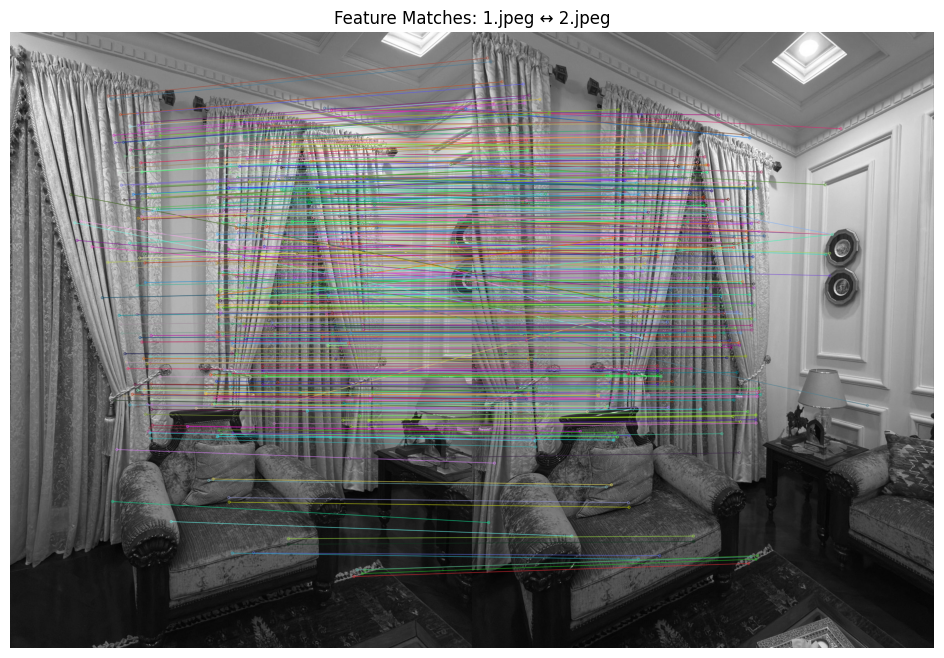

Image 2: 9735 keypoints, Image 3: 9136 keypoints
1617 good matches between 2 and 3


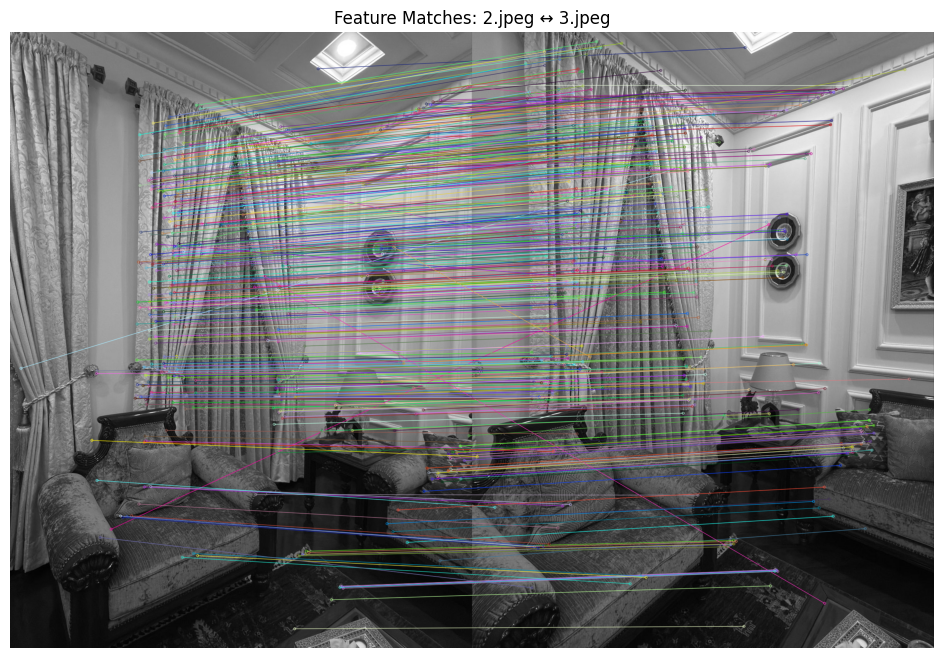

Image 3: 9136 keypoints, Image 4: 9247 keypoints
1781 good matches between 3 and 4


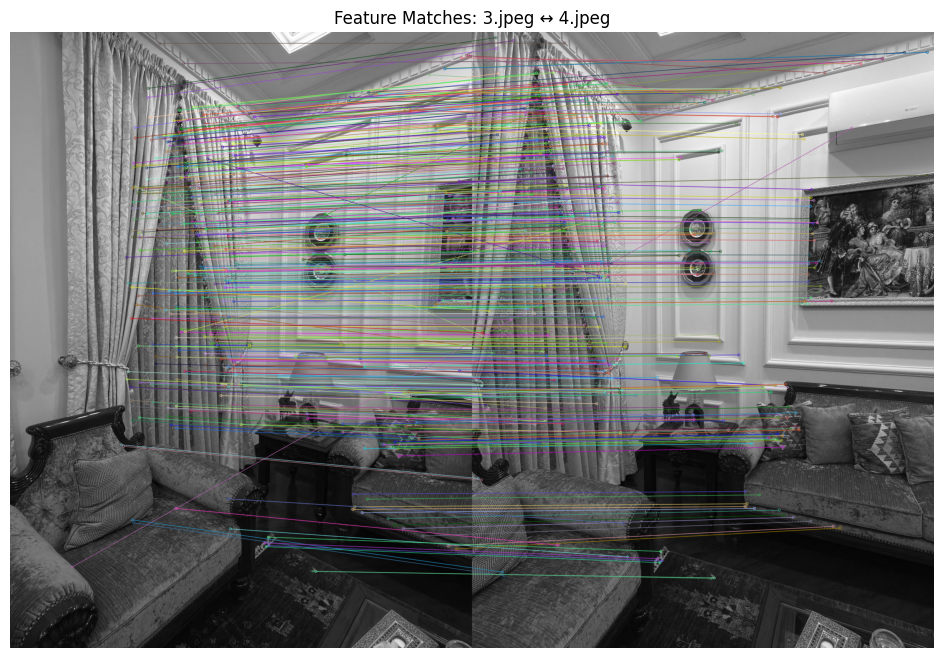

Image 4: 9247 keypoints, Image 5: 8916 keypoints
2887 good matches between 4 and 5


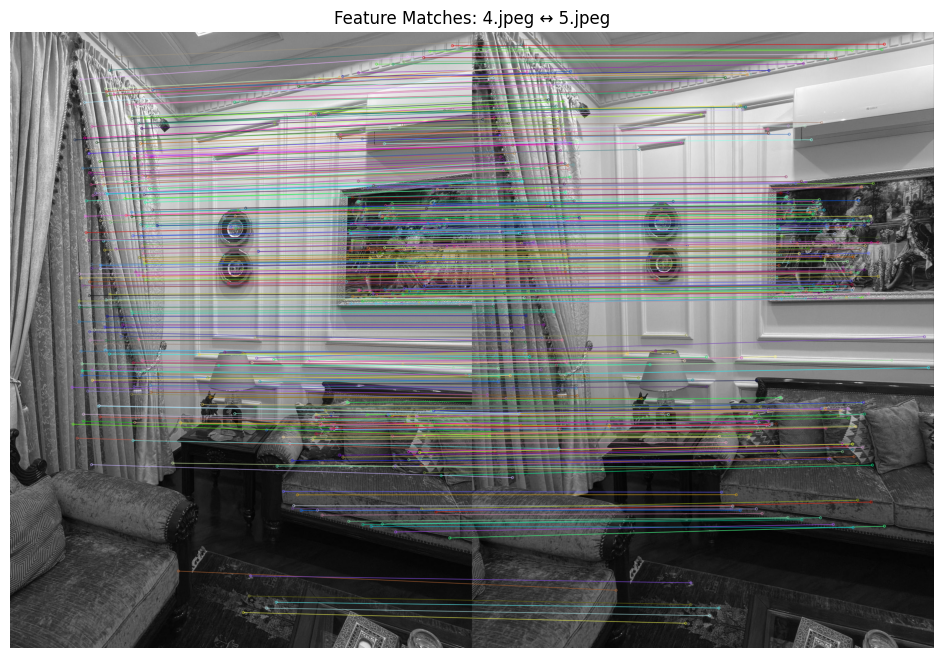

Image 5: 8916 keypoints, Image 6: 8144 keypoints
2906 good matches between 5 and 6


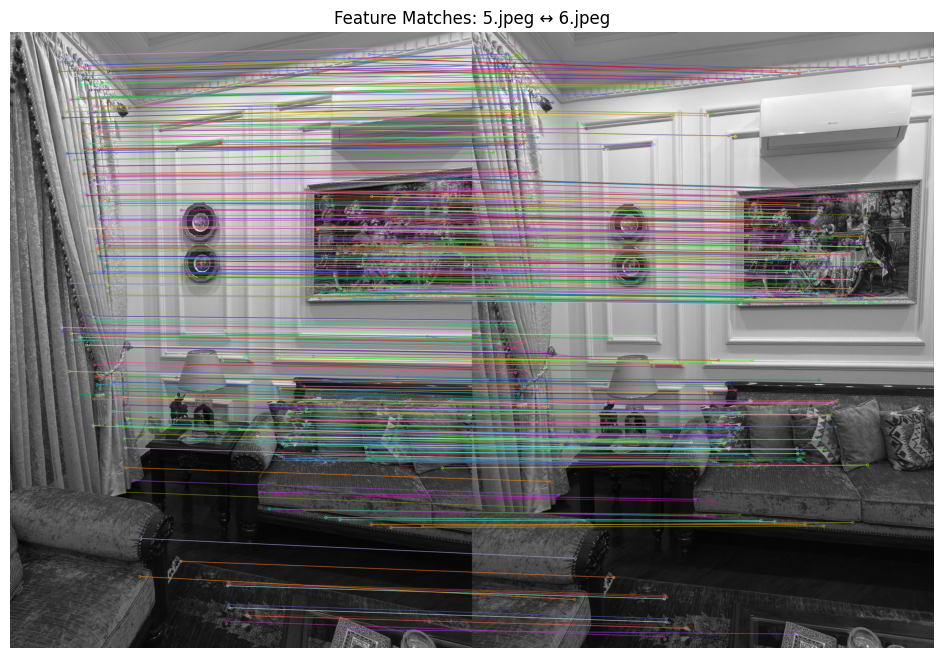

In [14]:
pairs = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]

for (i, j) in pairs:
    match_and_draw(i, j)